In [2]:
import pandas as pd
import numpy as np
import os
import sys
import simpledbf
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#download data
url = 'http://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/t310_dbf.zip'
os.system('wget ' + url)
os.system("mv " + 't310_dbf.zip data')
os.system('unzip data/t310_dbf.zip -d data/ephDBF')

0

In [3]:
dbf = simpledbf.Dbf5('data/ephDBF/Individual_t310.dbf',codec='latin1')
indRaw = dbf.to_dataframe()
indRaw.head()

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,301358,1,1,1,2010,3,43,S,2,647,...,02,02,02,02,NaN,01,0,0,0,00010
1,304669,1,1,1,2010,3,43,S,2,417,...,04,04,03,03,NaN,03,0,0,0,10000
2,304669,1,2,1,2010,3,43,S,2,417,...,04,04,03,03,NaN,03,0,0,0,10000
3,304669,1,3,1,2010,3,43,S,2,417,...,04,04,03,03,NaN,03,0,0,0,00000
4,302366,1,1,1,2010,3,43,S,2,715,...,10,10,10,10,NaN,10,0,0,0,00000


In [4]:
indNoW = indRaw.loc[indRaw.REGION == 1,['CODUSU',
                    'NRO_HOGAR',
                    'COMPONENTE',
                    'AGLOMERADO',
                    'PONDERA',
                    'CH03',
                    'CH04',
                    'CH06',
                    'CH10',
                    'CH12',
                    'CH13',
                    'CH14',
                    'ESTADO',
                    'CAT_OCUP',
                    'CAT_INAC',
                    'ITF',
                    'IPCF',
                    'P47T']]
indNoW.head()

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH10,CH12,CH13,CH14,ESTADO,CAT_OCUP,CAT_INAC,ITF,IPCF,P47T
44316,302468,1,1,32,1287,1,2,20,1,7,2,01,3,0,3,4000,2000.0,2000
44317,302468,1,2,32,1287,10,2,20,1,6,2,01,3,0,3,4000,2000.0,2000
44318,307861,1,1,32,1674,1,1,42,2,2,1,NaN,1,3,0,5800,1450.0,3000
44319,307861,1,2,32,1674,2,2,44,2,7,1,NaN,1,3,0,5800,1450.0,2800
44320,307861,1,3,32,1674,3,1,13,1,4,2,00,3,0,3,5800,1450.0,0


In [167]:
indNoW.columns = ['CODUSU',
                    'NRO_HOGAR',
                    'COMPONENTE',
                    'AGLOMERADO',
                    'PONDERA',
                    'familyRelation', 
                    'female',
                    'age',
                    'schooled',
                    'schoolYear',
                    'finishedYear',
                    'lastYear',
                    'activity',
                    'unempCond',
                    'empCond',
                    'ITF',
                    'IPCF',
              'P47T']
indNoW.index =range(0,ind.shape[0])

indNoW.head()

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,familyRelation,female,age,schooled,schoolYear,finishedYear,lastYear,activity,unempCond,empCond,ITF,IPCF,P47T
0,302468,1,1,32,1287,1,2,20,1,7,2,1.0,3,0,3,4000,2000.0,2000
1,302468,1,2,32,1287,10,2,20,1,6,2,1.0,3,0,3,4000,2000.0,2000
2,307861,1,1,32,1674,1,1,42,2,2,1,NaN,1,3,0,5800,1450.0,3000
3,307861,1,2,32,1674,2,2,44,2,7,1,NaN,1,3,0,5800,1450.0,2800
4,307861,1,3,32,1674,3,1,13,1,4,2,0.0,3,0,3,5800,1450.0,0


In [5]:
#change ears os school to numeric
indNoW.lastYear = pd.to_numeric(ind.lastYear, errors='coerce')
indNoW.age2 = indNoW.age ** 2
indNoW.head()

NameError: name 'ind' is not defined

In [171]:
# limpieza de cariables y cateogrias
print indNoW.female.value_counts()
#1 = male
#2 = women

indNoW.female = indNoW.female == 2

print indNoW.female.value_counts()


2    4447
1    3913
Name: female, dtype: int64
True     4447
False    3913
Name: female, dtype: int64


In [172]:
# anos de escolaridad por nivel
# funcion en R https://github.com/alephcero/incomeMapBuenosAires/blob/master/src/schoolYears.R


# ver la curva de ingresos segun edad y la curva de ingresos segun anos de escolaridad, partirla en 3 o usar x y x2
#construir igual anos de escolaridad


# variables dummy para cada grupo de edad 

#r1. Esc_1 + r2. Esc_2 + r3. Esc_3 +  v_14a24 GBA + v_25a34GBA + m_14a24 GBA + m_25a34GBA  +  m_35ymás GBA +  


print indNoW.schooled.value_counts()
#1 = Si, asiste
#2 = No asiste, pero asistió
#3 = Nunca asistió 


2    5506
1    2383
0     253
3     211
9       7
Name: schooled, dtype: int64


In [176]:
#http://stackoverflow.com/questions/26777832/replicating-rows-in-a-pandas-data-frame-by-a-column-value/26778637#26778637
ind = indNoW.loc[np.repeat(indNoW.index.values,indNoW.PONDERA)]
ind.shape

(13059409, 18)

In [177]:
ind.to_csv('data/ind.csv')

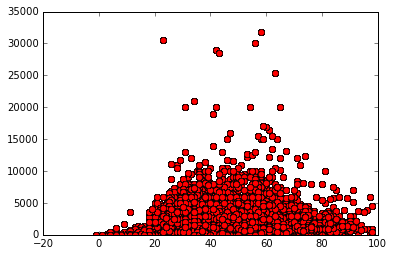

In [179]:
plt.plot(ind.age,ind.P47T,'ro')

In [180]:
print smf.ols(formula = 'P47T ~ age', data = ind).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                   P47T   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                 1.552e+06
Date:                Wed, 02 Nov 2016   Prob (F-statistic):               0.00
Time:                        19:06:15   Log-Likelihood:            -1.1841e+08
No. Observations:            13059409   AIC:                         2.368e+08
Df Residuals:                13059407   BIC:                         2.368e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    360.8311      1.064    339.035      0.0

In [ ]:
print smf.ols(formula = 'P47T ~ age ', data = ind).fit().summary()